# <font color=green> Heurística de recomendação
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
filmes = pd.read_csv("datasets/movies.csv")
filmes.columns = ['filmeId', "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
mov = filmes.columns
mov

Index(['filmeId', 'titulo', 'generos'], dtype='object')

In [ ]:
notas = pd.read_csv("datasets/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
filmes = filmes.set_index('filmeId')
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação:heurística de total de votos
Indicação pelos mais populares ou seja os mais vistos

In [ ]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [ ]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [ ]:
filmes.sort_values("total_de_votos", ascending=False).head()

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [ ]:
notas_medias = notas.groupby('filmeId').mean()['nota']
filmes['nota_media'] = notas_medias
filmes.sort_values("total_de_votos", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


Então percebemos que o mais visto ou seja popular não obtém a uma média satisfatória

# Uma segunda heurística: Nota média e filtrando votos

####Buscando saber um pouco mais sobre o usuário é possivel ter uma capacidade melhor de pensar em uma recomendação mais precisa que estas duas heurísticas abordadas

In [ ]:
filmes.sort_values("nota_media", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [ ]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [ ]:
filmes_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_mais_de_50_votos.sort_values("nota_media", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


# Uma terceira heurística: recomendação baseado no ultimo filme assistido com a certa similaridade ou seja o mesmo genêro

####Para dar qualidade a recomendação utiliza o: 
total_de_votos para retirar filmes muito de nicho
nota_media para que possa dar uma preferêndia para a recomendação

In [ ]:
eu_assisti = [1,318,50,19,10,5,7,2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204.0,4.237745
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
aventura_infantil_fantasia = filmes_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy' ")
aventura_infantil_fantasia.drop(eu_assisti,axis=0,errors='ignore').sort_values('nota_media',ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


In [ ]:
# Colaborative filtering x Content based filtering

#Procurar usuários "similares"

- josé deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância


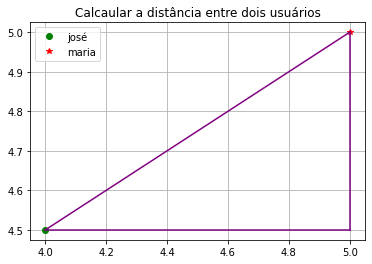

In [ ]:
plt.plot(4,4.5,"go")
plt.plot(5,5,"r*")
plt.legend(["josé","maria"])
plt.title("Calcaular a distância entre dois usuários")
plt.grid()

plt.plot([4, 5], [4.5, 4.5],color="purple")
plt.plot([4, 5], [4.5, 5],color="purple")
plt.plot([5, 5], [4.5, 5],color="purple")
plt.show()

In [ ]:
jose = np.array([4, 4.5])
maria = np.array([5, 5])
jose-maria

array([-1. , -0.5])

In [ ]:
def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return np.sqrt(delta_x**2+delta_y**2)
pitagoras(jose,maria)

1.118033988749895

In [ ]:
def pitagoras(a,b):
  return np.linalg.norm(a-b)
pitagoras(jose,maria)

1.118033988749895

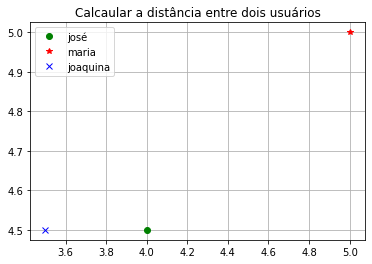

In [ ]:
plt.plot(4,4.5,"go")
plt.plot(5,5,"r*")
plt.plot(3.5,4.5,"bx")
plt.legend(["josé","maria",'joaquina'])
plt.title("Calcaular a distância entre dois usuários")
plt.grid()
plt.show()

In [ ]:
joaquina = np.array([3.5,4.5])
def distancia_de_vetores(a,b):
  return np.linalg.norm(a-b)


In [ ]:
print(distancia_de_vetores(jose,maria))
print(distancia_de_vetores(jose,joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [ ]:
def notas_do_usuario(usuario):
  notas_usuario = notas.query("usuarioId == %d"% usuario)
  notas_usuario = notas_usuario[['filmeId','nota']].set_index('filmeId')
  return notas_usuario

In [ ]:
usuario_1 = notas_do_usuario(1)
usuario_4 = notas_do_usuario(3)

In [ ]:
diferencas = usuario_1.join(usuario_4,lsuffix='_direita',rsuffix='_esquerda').dropna()

In [ ]:
distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)

8.200609733428363

In [ ]:
def distancia_de_usuarios(usuario_id1,usuario_id2):
  #filtrar notas
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  #manter filmes em comum e dropar diferenças
  diferencas = notas1.join(notas2,lsuffix='_direita',rsuffix='_esquerda').dropna()
  #calculando a distancia
  distancia = distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)
  gerando_distancia = [usuario_id1, usuario_id2, distancia]
  return gerando_distancia

In [ ]:
distancia_de_usuarios(1,3)

[1, 3, 8.200609733428363]

In [ ]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("temos %d usuarios" % quantidade_de_usuarios)

temos 610 usuarios


In [ ]:
def distancia_de_todos(voce_id):
  distancias = []
  # Para cada usuario_id dentro de notas['usuarioId'].unique()
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [ ]:
def distancia_de_todos(voce_id):
  #pra cada um dos elementos desse for crie uma lista
  todos_os_usuarios = notas['usuarioId'].unique()
  
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns=["voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head(70)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
...,...,...,...
65,1,66,8.411302
66,1,67,3.464102
67,1,68,21.558061
68,1,69,3.316625


In [ ]:
notas_do_usuario(1).join(notas_do_usuario(496), lsuffix="1", rsuffix="_2").dropna()

,nota1,nota_2
filmeId,,


# Usuarios sem filmes em comum são colocados bem distantes

In [ ]:
def distancia_de_usuarios(usuario_id1,usuario_id2,minimo=5):
  #filtrar notas
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)

  #manter filmes em comum e dropar diferenças
  diferencas = notas1.join(notas2,lsuffix='_direita',rsuffix='_esquerda').dropna()
  
  if(len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000]
  
  #calculando a distancia
  distancia = distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [ ]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000


#Parâmetros para teste

In [ ]:
# por padrão se não for setado na chamada o numeros_de_usuarios_a_analisar
# a função trará todos os usuarios sem limitações
def mais_proximos_de(voce_id, numeros_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias

In [ ]:
def distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = None):
  #pra cada um dos elementos desse for crie uma lista
  todos_os_usuarios = notas['usuarioId'].unique()

  # se numeros_de_usuarios_a_analisar for passado 
  # vai filtrar somente até o numeros_de_usuarios_a_analisar setado
  if numeros_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numeros_de_usuarios_a_analisar]
  
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns=["voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(2, numeros_de_usuarios_a_analisar=50)

,voce,outra_pessoa,distancia
0,2,1,100000.000000
1,2,2,0.000000
2,2,3,100000.000000
3,2,4,100000.000000
4,2,5,100000.000000
5,2,6,100000.000000
6,2,7,100000.000000
7,2,8,100000.000000
8,2,9,100000.000000
9,2,10,4.949747


In [ ]:
def distancia_de_usuarios(usuario_id1,usuario_id2,minimo=5):
  #filtrar notas
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)

  #manter filmes em comum e dropar diferenças
  diferencas = notas1.join(notas2,lsuffix='_direita',rsuffix='_esquerda').dropna()
  
  # Se o usuario é muito diferente de mim retorna nada
  if(len(diferencas) < minimo):
    return None
  
  #calculando a distancia
  distancia = distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = None):
  #pra cada um dos elementos desse for crie uma lista
  todos_os_usuarios = notas['usuarioId'].unique()
  if numeros_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numeros_de_usuarios_a_analisar]
  
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  # criando uma lista baseada no resultado do filtro
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns=["voce", "outra_pessoa", "distancia"])
  return distancias


In [ ]:
# chamando a função e definindo o subconjunto de usuarios que ela vai analiasar
mais_proximos_de(2, numeros_de_usuarios_a_analisar = 50)

,voce,distancia
outra_pessoa,,
16,2,2.000000
17,2,2.179449
29,2,2.179449
25,2,2.236068
24,2,2.291288
28,2,2.397916
22,2,3.000000
30,2,3.391165
21,2,4.153312


In [ ]:
voce = 2
similares = mais_proximos_de(voce, numeros_de_usuarios_a_analisar = 50)
# iloc localiza por numero da linha enquanto o loc pelo numero do indice
similar = similares.iloc[0].name
notas_do_similar = notas_do_usuario(similar)
notas_do_similar.head()

,nota
filmeId,
47,3.5
50,4.0
111,4.5
204,2.0
260,3.0


##### Removendo os filmes que voce assisti


In [ ]:
def sugere_para(voce, numeros_de_usuarios_a_analisar = None):
  # extraindo as notas dos filmes que voce ja viu
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index
  # pegando as pessoas mais similares
  similares = mais_proximos_de(voce, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  #Dropando as notas dos filmes que você ja viu
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  # ordenando de acordo com a nota
  recomendacoes = notas_do_similar.sort_values('nota', ascending=False)
  # join para juntar o nome do filme com a nota 
  return recomendacoes.join(filmes)

#####Filmes recomendados

In [ ]:
sugere_para(2, numeros_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1199,5.0,Brazil (1985),Fantasy|Sci-Fi,59.0,4.177966
78499,4.5,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,55.0,4.109091
1252,4.5,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,59.0,4.211864
750,4.5,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
4226,4.5,Memento (2000),Mystery|Thriller,159.0,4.122642


chamando a função só que desta vez sem definir o parâmetro ou seja se comparando com todas as pessoas da base

In [ ]:
sugere_para(2).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
3083,5.0,All About My Mother (Todo sobre mi madre) (1999),Drama,19.0,4.157895
2360,5.0,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
27815,5.0,"Chorus, The (Choristes, Les) (2004)",Drama,11.0,3.909091
296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
3451,5.0,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455


Buscando melhorar o algoritmo, podemos pensar que nosso sistema atual possa falhar quando os filmes se tratarem de um nicho específico daquela pessoa.

Por exemplo, se você gosta muito de filmes de Faroeste, e um outra pessoa tambem goste, mas nos filmes da outra pessoa haja um gosto mais variado que não siga fielmente ao nicho de Faroeste. 

E por exemplo a outra pessoa tenha assistido Vingadores, e avaliado com uma boa nota, na hora de recomendar os filmes, será feita a recomendação dos Vingadores para a você com base na semelhança do nicho de filme que é o Faroeste.

Mas o que garante que você irá gostar? por estar correndo fora da bolha de seus gostos ao recomendar esse filme.

Na prática, com o objetivo de deixar a recomendação mais fiel, devemos aumentar o número de usuarios, ou seja não se basear em uma unica pessoa e sim em varias

# Sugerindo baseado em vários usuários

In [ ]:
voce, numeros_de_usuarios_a_analisar = 2, 50
# extraindo as notas dos filmes que voce ja viu
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index
# pegando as pessoas mais similares
similares = mais_proximos_de(voce, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
similar = similares.iloc[0].name
#Dropando as notas dos filmes que você ja viu
notas_do_similar = notas_do_usuario(similar)
notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
# ordenando de acordo com a nota
recomendacoes = notas_do_similar.sort_values('nota', ascending=False)
# join para juntar o nome do filme com a nota 
recomendacoes.join(filmes).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1199,5.0,Brazil (1985),Fantasy|Sci-Fi,59.0,4.177966
78499,4.5,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,55.0,4.109091
1252,4.5,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,59.0,4.211864
750,4.5,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
4226,4.5,Memento (2000),Mystery|Thriller,159.0,4.122642


In [ ]:
def knn(voce_id, k=10,numeros_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)
  return distancias.head(k)

In [ ]:
knn(2, k=2,numeros_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
189,2,1.224745
131,2,1.322876


In [ ]:
def sugere_para(voce, k=10, numeros_de_usuarios_a_analisar=None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index 

  similares = knn(voce, k = k,numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]

  # retorna uma serie por se tratar de uma unica coluna
  # então deve-se selecionar essa "lista" de coluna
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]

  recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

#####Teste Analisando 50 usuarios

In [ ]:
sugere_para(2, numeros_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1,3.833333,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,3.250000,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
6,4.000000,Heat (1995),Action|Crime|Thriller,102.0,3.946078
10,5.000000,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
16,3.500000,Casino (1995),Crime|Drama,82.0,3.926829


#####Teste Analisando 300 usuarios

In [ ]:
sugere_para(2, numeros_de_usuarios_a_analisar = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1,2.875,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,3.000,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,3.500,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,4.500,Heat (1995),Action|Crime|Thriller,102.0,3.946078
10,3.750,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212


#####Teste Analisando todos os usuarios

In [ ]:
sugere_para(2).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1,3.500000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,2.666667,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,2.750000,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
5,0.500000,Father of the Bride Part II (1995),Comedy,49.0,3.071429
6,4.500000,Heat (1995),Action|Crime|Thriller,102.0,3.946078


#Testar um usuário novo

In [ ]:
filmes.loc[[122904,1246,2529,2329,2324,1,7,2,1196,260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=['filmeId', 'nota'])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [ ]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,5],[2,5],[1196,1],[260,1]])
notas.tail()

,usuarioId,filmeId,nota,momento
5,611,1,2.0,NaN
6,611,7,5.0,NaN
7,611,2,5.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [ ]:
sugere_para(611)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1,3.000000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,3.166667,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,3.500000,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
5,2.000000,Father of the Bride Part II (1995),Comedy,49.0,3.071429
6,4.250000,Heat (1995),Action|Crime|Thriller,102.0,3.946078
...,...,...,...,...,...
184245,5.000000,De platte jungle (1978),Documentary,1.0,5.000000
184471,0.500000,Tomb Raider (2018),Action|Adventure|Fantasy,4.0,2.500000
188675,3.500000,Dogman (2018),Crime|Drama,1.0,3.500000


#Utilizar somente as notas de filmes com mais de 50 votos

In [ ]:
# Dados só dos filmes com mais de 50 votos
notas = notas.set_index('filmeId').loc[filmes_mais_de_50_votos.index]
notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09


In [ ]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [ ]:
sugere_para(611)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1,3.000000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,3.166667,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,3.500000,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,4.250000,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,4.000000,Sabrina (1995),Comedy|Romance,54.0,3.185185
...,...,...,...,...,...
106782,3.000000,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54.0,3.916667
109374,4.000000,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52.0,3.778846
109487,3.500000,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


Mas o algoritmo ainda não se encontra com recomendações precisas, por se basear em média se somente uma pessoa assistiu e gostou do filme e deu nota 5 a média é 5 e enfim nos mostra um exemplo de viés no algoritmo

Mais vale um filme com nota 4.5 que 4 pessoas avaliaram
Do que um filme com nota 5 que apenas 1 pessoa avaliou

#Implementando um mínimo de filmes em comum

In [ ]:
def sugere_para(voce, k=10, numeros_de_usuarios_a_analisar=None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index 

    similares = knn(voce, k = k,numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]

    # retorna uma serie por se tratar de uma unica coluna
    # então deve-se selecionar essa "lista" de coluna
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]
    aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]

    filtro_minnimo = k/2
    recomendacoes = recomendacoes.join(aparicoes, lsuffix='_nota_media_dos_usuarios', rsuffix='_aparicoes_nos_usuarios')
    recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minnimo)
    recomendacoes = recomendacoes.sort_values('nota_nota_media_dos_usuarios', ascending=False)
    recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
    return recomendacoes.join(filmes)

In [ ]:
def knn(voce_id, k=10,numeros_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id,errors='ignore')
  return distancias.head(k)

####Testando o filtro minimo com k como padrão que é 10

In [ ]:
sugere_para(611).head(10)

,nota_nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
4011,4.400000,5,Snatch (2000),Comedy|Crime|Thriller,93.0,4.155914
590,4.357143,7,Dances with Wolves (1990),Adventure|Drama|Western,164.0,3.835366
356,4.350000,10,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
46578,4.333333,6,Little Miss Sunshine (2006),Adventure|Comedy|Drama,77.0,3.883117
318,4.312500,8,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
5618,4.300000,5,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,87.0,4.155172
4973,4.300000,10,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.183333
2502,4.300000,5,Office Space (1999),Comedy|Crime,94.0,4.090426
79132,4.250000,6,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


####Testando o filtro minimo com k definido como 20

In [ ]:
sugere_para(611,k=20).head(10)

,nota_nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
1197,4.300000,10,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,142.0,4.232394
593,4.266667,15,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
7361,4.230769,13,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
590,4.208333,12,Dances with Wolves (1990),Adventure|Drama|Western,164.0,3.835366
296,4.187500,16,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
4973,4.153846,13,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.183333
2692,4.150000,10,Run Lola Run (Lola rennt) (1998),Action|Crime,75.0,4.000000
4878,4.150000,10,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,109.0,3.981651
318,4.125000,16,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022


####sql

In [ ]:
# SELECT
#     part_d_prescriber_2014.nppes_provider_state  AS part_d_prescriber_2014_nppes_provider_state,
#     part_d_prescriber_2014.drug_name  AS part_d_prescriber_2014_drug_name,
#     COUNT(*) AS part_d_prescriber_2014_count
# FROM `healthcare_demo.part_d_prescriber_2014`
#      AS part_d_prescriber_2014
# GROUP BY
#     1,
#     2
# ORDER BY
#     3 DESC
# LIMIT 500

In [ ]:
# SELECT
#     part_d_prescriber_2014.nppes_provider_state  AS part_d_prescriber_2014_nppes_provider_state,
#     part_d_prescriber_2014.drug_name  AS part_d_prescriber_2014_drug_name,
#     COUNT(*) AS part_d_prescriber_2014_count
# FROM `healthcare_demo.part_d_prescriber_2014`
#      AS part_d_prescriber_2014
# GROUP BY
#     1,
#     2
# ORDER BY
#     3 DESC
# LIMIT 500